# Finding the 2 best markets to advertise an E-learning product in

We're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

It's costly to organise surveys to do market research, so we'll be using data from freeCodeCamp's 2017 New Coder Survey, as it is a free resource that is relevant for our purpose.

freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis. The data can be found [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

## Reading the data into a dataframe

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)


In [4]:
survey_data.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


For the purpose of our analysis, we want to answer questions about new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

## Is the data representative?

We'll start by analysing the role(s) that participants are interested in working in, as they're likely to want to learn about that area.

In [6]:
# Generating a frequency distribution table
survey_data['JobRoleInterest'].value_counts(normalize=True)*100


Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

There are many possible answers to this question, but from the frequency table, we can see that:

- The most popular job roles tend to be in web development (full-stack, front-end, back-end). There also seem a be a number of people interested in mobile development
- There appear to be many respondents who are interested in multiple job roles

However, it's hard to tell from the frequency table above how many job roles people tend to be interested in, and how many people are interested in web and mobile development. To get a better understanding of this, we'll analyse how many roles people tend to be interested in, and how many people are interested in web / mobile development.

We'll drop rows where respondents didn't indicate what job role they're interested in, as we won't know what their interests are.

In [7]:
# Drop rows with values in JobRoleInterest column
survey_data.dropna(subset=['JobRoleInterest'], inplace=True)
# Count roles in JobRoleInterest column and generate a frequency distribution table
survey_data['rolecounts'] = survey_data['JobRoleInterest'].str.count(',')+1
survey_data['rolecounts'].value_counts(normalize=True)*100


1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: rolecounts, dtype: float64

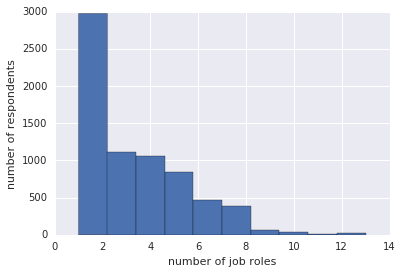

In [8]:
# Visualising the frequencies
plt.hist(survey_data['rolecounts'])
plt.ylabel('number of respondents')
plt.xlabel('number of job roles')
plt.show()

From the table and graph above, we can see that about 3000 (about a third) respondents are only interested in one job role, and most respondents are interested in 5 roles or less.

The fact that people are interested in more than one subject doesn't affect how representative the sample is, as our courses also cover a range of areas.

### How many people are interested in web and mobile development?

Now we'll do some analysis to see how many respondents indicated web or mobile development as one of the job roles that they are intersted in.

In [9]:
# Checking how many people are interested in web development
survey_data['webdev_count'] = survey_data['JobRoleInterest'].str.count('Web Developer')
webdev = survey_data[survey_data['webdev_count'] > 0]
webdev_int = webdev.shape[0] / survey_data.shape[0]
print('The % of respondents interested in web development is')
print(round(webdev_int*100,2))


The % of respondents interested in web development is
82.61


In [10]:
# Checking how many people are interested in mobile development
survey_data['mobdev_count'] = survey_data['JobRoleInterest'].str.count('Mobile Developer')
mobdev = survey_data[survey_data['mobdev_count'] > 0]
mobdev_int = mobdev.shape[0] / survey_data.shape[0]
print('The % of respondents interested in mobile development is')
print(round(mobdev_int*100,2))


The % of respondents interested in mobile development is
32.95


In [11]:
# Checking how many people are interested in web or mobile development
survey_data['webmob_count'] = survey_data['JobRoleInterest'].str.count('Mobile Developer|Web Developer')
webmob = survey_data[survey_data['webmob_count'] > 0]
webmob_int = webmob.shape[0] / survey_data.shape[0]
print('The % of respondents interested in both web and mobile development is')
print(round(webmob_int*100,2))

The % of respondents interested in both web and mobile development is
86.24


As about 86% respondents are interested in either web or mobile development, we can use this data for our analysis.

## Understanding where respondents live

We'll start with finding out where these new coders are located, and what are the densities (how many coders there are) for each country, as the data set provides locations based on countries.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in based on the number of potential customers.

In [111]:
# Count roles in CountryLive column and generate a frequency distribution table
print(survey_data['CountryLive'].value_counts(normalize=False))
print(survey_data['CountryLive'].value_counts(normalize=True)*100)


United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Philippines                        52
Serbia                             52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Argentina   

Based on the number of respondents living in each country, it seems we should focus on the USA and India. However, we should do further analysis before making a decision. 

We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

## How willing are respondents to spend money on online coding courses?

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [13]:
# Selecting data for these 4 countries
sample = survey_data[survey_data['CountryLive'].isin(['United States of America','India','United Kingdom','Canada'])]
sample['CountryLive'].value_counts()


United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Name: CountryLive, dtype: int64

In [83]:
# Replace 0 with 1 in MonthsProgramming column
sample['MonthsProgramming']=sample['MonthsProgramming'].replace(0,1)
sample['money_month'] = sample['MoneyForLearning'] / sample['MonthsProgramming']


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [84]:
sample['money_month'].value_counts()

0.000000        1844
16.666667         82
50.000000         76
25.000000         74
100.000000        68
8.333333          67
33.333333         64
20.000000         59
12.500000         51
10.000000         48
166.666667        47
83.333333         47
4.166667          38
66.666667         38
5.000000          37
500.000000        32
200.000000        31
250.000000        29
41.666667         28
20.833333         27
11.111111         26
2.500000          26
125.000000        25
3.333333          22
1000.000000       21
5.555556          20
30.000000         19
333.333333        18
75.000000         17
300.000000        16
                ... 
33.250000          1
291.666667         1
12.820513          1
21.666667          1
117.500000         1
0.714286           1
307.692308         1
23.809524          1
80000.000000       1
10.833333          1
3.076923           1
0.708333           1
1.428571           1
7.777778           1
1.612903           1
1066.666667        1
2.380952     

Less than half of the respondents in these 4 countries have not spend any money on online coding courses, so we'll drop these rows.

In [85]:
sample_money = sample[sample['money_month'] > 0]
sample_money.dropna(subset=['CountryLive'], inplace=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Now let's find out how much new coders spend on average on online coding courses each month in these 4 countries

In [86]:
sample_money.groupby('CountryLive')['money_month'].mean()

CountryLive
Canada                      238.970444
India                       311.202759
United Kingdom               92.730727
United States of America    413.043929
Name: money_month, dtype: float64

In [87]:
sample_money.groupby('CountryLive')['money_month'].median()

CountryLive
Canada                      25.000000
India                       20.000000
United Kingdom              20.833333
United States of America    33.333333
Name: money_month, dtype: float64

Based on the mean and median amount spent per person per respondent, we can see that learners in the USA spend the most. However, the median earner in Canada spends the 2nd highest amount, while the mean amount spent per month is 2nd highest in India.

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

Let's visualise the distributions to see if there are outliers.

### Dealing with outliers

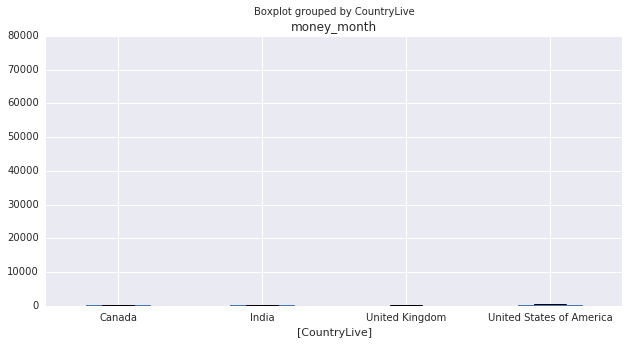

In [88]:
sample_money.boxplot(column=['money_month'],by=['CountryLive'],figsize = (10,5))
# plt.ylim(0, sample_money['money_month'].max())
plt.show()

In [89]:
print(sample_money[sample_money['money_month'] > 10000][['CountryLive','money_month']])

                    CountryLive   money_month
2478   United States of America  50000.000000
3930   United States of America  10833.333333
6805   United States of America  15000.000000
7198   United States of America  14000.000000
14024  United States of America  80000.000000
16650  United States of America  16666.666667
16997  United States of America  12500.000000
17231  United States of America  15000.000000


We can see that there are 2 outliers from the US who spend $50,000 or more per month. This seems very unlikely, so we'll eliminate them.

In [90]:
sample_cleaned = sample_money[sample_money['money_month'] < 20000]

In [91]:
sample_cleaned.groupby('CountryLive')['money_month'].mean()

CountryLive
Canada                      238.970444
India                       311.202759
United Kingdom               92.730727
United States of America    333.159012
Name: money_month, dtype: float64

In [92]:
sample_cleaned.groupby('CountryLive')['money_month'].median()

CountryLive
Canada                      25.000000
India                       20.000000
United Kingdom              20.833333
United States of America    33.333333
Name: money_month, dtype: float64

The mean values for the US and India still look quite high, so we'll do a bit more analysis of outliers in both.

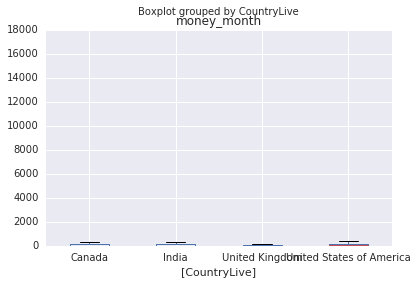

In [93]:
sample_cleaned.boxplot(column=['money_month'],by=['CountryLive'])
# plt.ylim(0, 19000)
plt.show()

In [94]:
for country in ['India','United Kingdom','Canada','United States of America']:
    print(sample_cleaned[(sample_cleaned['money_month'] >= 5000) & (sample_money['CountryLive'] == country)][['CountryLive','money_month']])


      CountryLive  money_month
1728        India       5000.0
7989        India       5000.0
8126        India       5000.0
13398       India      10000.0
Empty DataFrame
Columns: [CountryLive, money_month]
Index: []
      CountryLive  money_month
13659      Canada       5000.0
                    CountryLive   money_month
718    United States of America   8000.000000
1222   United States of America   6500.000000
3145   United States of America   5666.666667
3184   United States of America   9000.000000
3930   United States of America  10833.333333
5769   United States of America   5000.000000
6528   United States of America   5000.000000
6805   United States of America  15000.000000
7198   United States of America  14000.000000
7505   United States of America   6666.666667
8202   United States of America   5000.000000
8901   United States of America   5000.000000
9778   United States of America   8000.000000
13145  United States of America   5333.333333
16211  United States of America

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



We can see a some remaining outliers for India and the US (values over $5000 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these data points to see if we can find anything relevant.


In [96]:
for country in ['India','United States of America']:
    print(sample_cleaned[(sample_cleaned['money_month'] >= 5000) & (sample_cleaned['CountryLive'] == country)][['CountryLive','money_month','AttendedBootcamp','MonthsProgramming']])


      CountryLive  money_month  AttendedBootcamp  MonthsProgramming
1728        India       5000.0               0.0                4.0
7989        India       5000.0               0.0                1.0
8126        India       5000.0               0.0                1.0
13398       India      10000.0               0.0                2.0
                    CountryLive   money_month  AttendedBootcamp  \
718    United States of America   8000.000000               1.0   
1222   United States of America   6500.000000               1.0   
3145   United States of America   5666.666667               1.0   
3184   United States of America   9000.000000               1.0   
3930   United States of America  10833.333333               0.0   
5769   United States of America   5000.000000               0.0   
6528   United States of America   5000.000000               0.0   
6805   United States of America  15000.000000               1.0   
7198   United States of America  14000.000000            

We can see that none of those in India who spend \$5000 or more attended bootcamps, so this figure seems unlikely. The same goes for those in the US who didn't attend bootcamps, so we'll remove the data for those who spent \$5000 or more but didn't attend bootcamps.

There are also individuals who have spent >\$5000 who attended bootcamps, but who have been programming for <3 months. As such, it is likely that the large amount of expenditure could have been for the bootcamp, and they won't be spending money while they go through the bootcamp. We'll also remove these individuals.

In [104]:
# sample_final = sample_cleaned[(sample_cleaned['money_month'] < 5000) & (sample_cleaned[''])]
sample_cleaned.drop(sample_cleaned[(sample_cleaned['money_month'] >= 5000) & (sample_cleaned['AttendedBootcamp'] == 0)].index, inplace=True)
sample_cleaned.drop(sample_cleaned[(sample_cleaned['money_month'] >= 5000) & (sample_cleaned['MonthsProgramming'] <= 3)].index, inplace=True)
    

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [106]:
sample_cleaned.groupby('CountryLive')['money_month'].mean()

CountryLive
Canada                      196.837439
India                       190.618044
United Kingdom               92.730727
United States of America    237.993405
Name: money_month, dtype: float64

### Advertising recommendation

Based on the revised mean amounts, we should definitely advertise in the USA, as they have the most number of learners and the highest amount spent per month on average. However, we also need to decide on the 2nd market. People in Canada spend slightly more per month on average, but India has nearly twice the number of potential customers.

In [107]:
sample_cleaned.groupby('CountryLive')['money_month'].median()

CountryLive
Canada                      25.000000
India                       20.000000
United Kingdom              20.833333
United States of America    33.333333
Name: money_month, dtype: float64

We sell subscriptions at a price of \$59 per month. The median amount spent per month is higher in Canada (\$25 compared to India's \$20). However, as they are not too different, it appears that there could be a few options. Whatever is decided, the budget shouldn't be split equally given how much larger the market in the US is. 

- Advertise in US and India or US and Canada (70\% to US and 30\% to the other country)
- Advertise in US (65\%), India (20\%) and Canada (15\%)

Let's see whether either market has more people interested in web and mobile development before sharing the analysis.

In [116]:
for country in ['India','Canada']:
    interested = sample_cleaned[(sample_cleaned['webmob_count'] > 0) & (sample_cleaned['CountryLive']==country)]
    pct_int = interested.shape[0] / sample_cleaned[sample_cleaned['CountryLive']==country].shape[0]
    print('The % of respondents interested in both web and mobile development in ' + str(country) + ' is')
    print(round(pct_int*100,2))

The % of respondents interested in both web and mobile development in India is
84.26
The % of respondents interested in both web and mobile development in Canada is
90.27


Both countries have a high % of people interested in either web or mobile development. As we can't draw more conclusions from the data, it might make sense to share the analysis and options with the marketing team, so that they can use their domain knowledge to take the best decision.

## Conclusion 

In this project, we analysed data on the learning interests and expenditure of new coders and would recommend advertising our courses in the US. However, we decided to send our analysis to the marketing team to let them decide on the 2nd country as the data did not point to a distinct better option.